In [ ]:
!mamba install -y -c bioconda pysradb
!mkdir assembly_info.biosample.accession.output

In [ ]:
import sys
import time
import pandas as pd

from pysradb import SRAweb

db = SRAweb()
results=list()

file = open('SRR.txt',"r")
for srp in file:
    try:
        df = db.sra_metadata(srp)
        #df.to_csv("assembly_info.biosample.accession.output/{}.tsv".format(srp), sep="\t", index=False)
        results.append(df)
    except:
        sys.stderr.write("Error with {}\n".format(srp))
        time.sleep(0.5)
    time.sleep(0.5)

In [ ]:
final_df=pd.concat(results, axis=0, ignore_index=False)
final_df.to_csv('assembly_info.biosample.accession.output.tsv',sep="\t")

In [ ]:
#https://nbviewer.org/github/fedarko/wotplot/blob/main/docs/Tutorial.ipynb
!pip3 install wotplot pyfaidx

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$s_1$ (18 nt) →', ylabel='$s_2$ (18 nt) →'>)

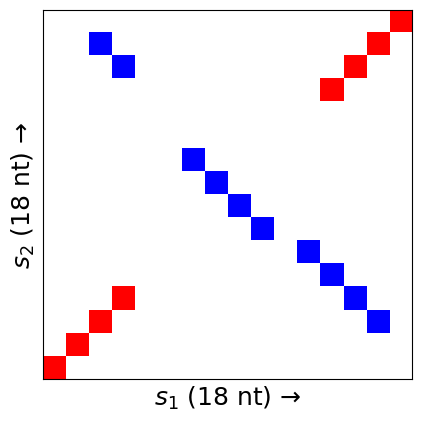

In [2]:
import wotplot

# Define our dataset
s1 = "AGCAGGAGATAAACCTGT"
s2 = "AGCAGGTTATCTACCTGT"
k = 3

# Create the matrix (setting binary=False means we'll distinguish forward,
# reverse-complementary, and palindromic matching k-mers from each other)
m = wotplot.DotPlotMatrix(s1, s2, k, binary=False)

# Convert the matrix to dense format and visualize it using matplotlib's
# imshow() function (for large matrices where dense representations are
# impractical, use viz_spy() instead; see below)
wotplot.viz_imshow(m)

In [3]:
import os
import wotplot
from matplotlib import pyplot
# the facecolor and transparent kargs force the saved figures to have a white background;
# from https://stackoverflow.com/a/64585557
savefig_kwargs = {"bbox_inches": "tight", "facecolor": "white", "transparent": False}

In [13]:
#!mamba install -c bioconda ncbi-datasets-cli -y -q
!wget https://ftp.ncbi.nlm.nih.gov/pub/datasets/command-line/v1/linux-amd64/datasets
!chmod +x datasets

--2023-09-05 11:07:16--  https://ftp.ncbi.nlm.nih.gov/pub/datasets/command-line/v1/linux-amd64/datasets
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.7, 130.14.250.11, 2607:f220:41e:250::11, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:443... 

connected.
HTTP request sent, awaiting response... 200 OK
Length: 15530746 (15M)
Saving to: ‘datasets’

datasets            100%[===================>]  14.81M  16.6MB/s    in 0.9s    

2023-09-05 11:07:18 (16.6 MB/s) - ‘datasets’ saved [15530746/15530746]



In [ ]:
!./datasets download genome accession GCF_000695935.1 --filename GCF_000695935.1.zip && unzip -n GCF_000695935.1.zip
!rm -f GCF_000695935.1.zip

In [39]:
import pyfaidx
e1 = pyfaidx.Fasta(os.path.join("data", "/workspace/sandbox-2023/ncbi_dataset/data/GCF_000695935.1/GCF_000695935.1_ASM69593v1_genomic.fna"))
e2 = pyfaidx.Fasta(os.path.join("data", "/workspace/sandbox-2023/ncbi_dataset/data/GCF_000695935.1/GCF_000695935.1_ASM69593v1_genomic.fna"))

In [61]:
e1s = str(e1[list(e1.records)[3]])
e2s = str(e2[list(e2.records)[3]])

In [62]:
em = wotplot.DotPlotMatrix(e1s, e2s, 20, verbose=True,binary=False)

0.00s: validating inputs...
0.01s: computing suffix array for s1...
0.02s: computing suffix array for s2...
0.09s: computing ReverseComplement(s2)...
0.11s: computing suffix array for ReverseComplement(s2)...
0.19s: finding forward matches between s1 and s2...
1.46s: found 108,249 forward match cell(s).
1.47s: finding matches between s1 and ReverseComplement(s2)...
2.56s: found 132,977 total match cell(s).
2.56s: density = 0.00%.
2.57s: converting match information to COO format inputs...
2.60s: creating sparse matrix from COO format inputs...
2.63s: done creating the matrix.


In [63]:
f"{em.mat.shape[0] * em.mat.shape[1]:,} cells."

'8,055,242,001 cells.'

In [64]:
em.mat.shape

(89751, 89751)

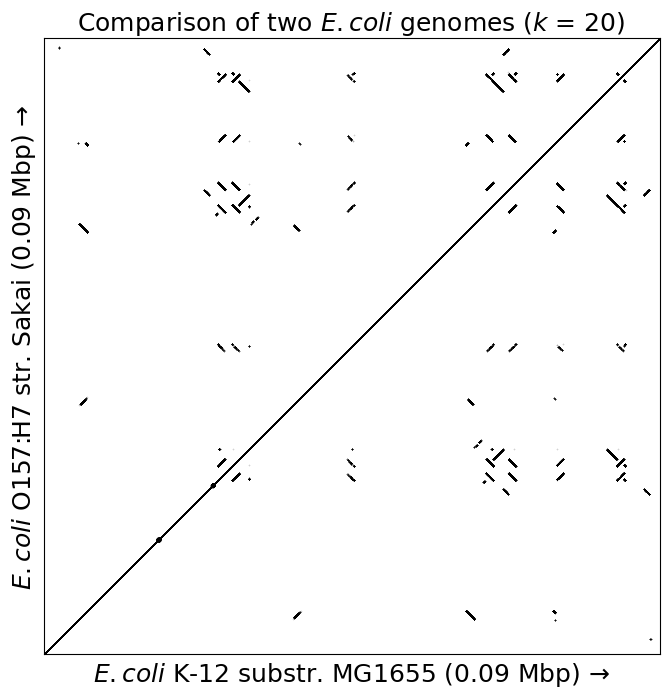

In [65]:
fig, ax = pyplot.subplots()
wotplot.viz_spy(em, markersize=0.05, title=f"Comparison of two $E. coli$ genomes ($k$ = {em.k})", ax=ax)
ax.set_xlabel(f"$E. coli$ K-12 substr. MG1655 ({len(e1s)/1e6:.2f} Mbp) \u2192")
ax.set_ylabel(f"$E. coli$ O157:H7 str. Sakai ({len(e2s)/1e6:.2f} Mbp) \u2192")
fig.set_size_inches(8, 8)
#fig.savefig(os.path.join("img", "ecoli_example_dotplot.png"), **savefig_kwargs)